# 모기지수와 기상정보 간의 관계

## 소개
- 2020년부터 최근까지의 모기지수와 기상측정치 간 관계를 분석해보고 시각화한 프로젝트
- 2020년 이후 모기지수 측정값이 변경되어 2020년~최근까지 모기지수 데이터 활용

## 데이터셋
- [기상청](https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36&tabNo=1)  
    - 서울시 기상관측치(2020년 1월 ~ 2022년 5월)  

    
- [서울 열린데이터 광장](http://data.seoul.go.kr/dataList/OA-13285/S/1/datasetView.do)
    - 서울시 모기예보제 정보(2020년 1월 ~ 2022년 5월)

### 1. 라이브러리

In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.family'] ='AppleGothic'
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

### 2. Data Load

In [2]:
# 모기예보제 정보, 기상측정치
mos = pd.read_csv('/Users/son-yuseon/Desktop/likelion/data/mos.csv', encoding='CP949')
weather = pd.read_csv('/Users/son-yuseon/Desktop/likelion/data/weather_data.csv', encoding='CP949')

In [3]:
'''2020년~2022년까지 모지지수 발생일 데이터 수집'''

# 2020~2022년 데이터 수집
mos_filered=mos[mos['모기지수 발생일'].between('2020-01-01', '2022-05-24')]

# 날짜 데이터 오름차순 정리
mos = mos_filered.sort_index(ascending=False)
mos

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
984,2020-01-01,5.5,5.5,5.5
983,2020-01-02,5.5,5.5,5.5
982,2020-01-03,5.5,5.5,5.5
981,2020-01-04,5.5,5.5,5.5
980,2020-01-05,5.5,5.5,5.5
...,...,...,...,...
4,2022-05-20,99.3,39.2,41.6
3,2022-05-21,100.0,40.2,42.3
2,2022-05-22,98.7,40.8,41.3
1,2022-05-23,100.0,38.9,43.1


### 3. 데이터 요약

In [4]:
# mos
mos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 984 to 0
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   모기지수 발생일   985 non-null    object 
 1   모기지수(수변부)  984 non-null    float64
 2   모기지수(주거지)  984 non-null    float64
 3   모기지수(공원)   984 non-null    float64
dtypes: float64(3), object(1)
memory usage: 38.5+ KB


In [5]:
# weather
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   일시            875 non-null    object 
 1   평균기온(°C)      875 non-null    float64
 2   최저기온(°C)      875 non-null    float64
 3   최고기온(°C)      875 non-null    float64
 4   최대 풍속(m/s)    875 non-null    float64
 5   평균 풍속(m/s)    875 non-null    float64
 6   최소 상대습도(%)    875 non-null    float64
 7   평균 상대습도(%)    875 non-null    float64
 8   최고 해면기압(hPa)  874 non-null    float64
 9   최저 해면기압(hPa)  874 non-null    float64
 10  평균 해면기압(hPa)  874 non-null    float64
 11  평균 지면온도(°C)   875 non-null    float64
dtypes: float64(11), object(1)
memory usage: 82.2+ KB


### 4. 중복값 확인

In [6]:
# mos 중복값 확인
mos.duplicated

<bound method DataFrame.duplicated of        모기지수 발생일  모기지수(수변부)  모기지수(주거지)  모기지수(공원)
984  2020-01-01        5.5        5.5       5.5
983  2020-01-02        5.5        5.5       5.5
982  2020-01-03        5.5        5.5       5.5
981  2020-01-04        5.5        5.5       5.5
980  2020-01-05        5.5        5.5       5.5
..          ...        ...        ...       ...
4    2022-05-20       99.3       39.2      41.6
3    2022-05-21      100.0       40.2      42.3
2    2022-05-22       98.7       40.8      41.3
1    2022-05-23      100.0       38.9      43.1
0    2022-05-24       99.3       39.8      42.9

[985 rows x 4 columns]>

In [7]:
# mos 중복값 제거
mos = mos.drop_duplicates(['모기지수 발생일'])
mos

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
984,2020-01-01,5.5,5.5,5.5
983,2020-01-02,5.5,5.5,5.5
982,2020-01-03,5.5,5.5,5.5
981,2020-01-04,5.5,5.5,5.5
980,2020-01-05,5.5,5.5,5.5
...,...,...,...,...
4,2022-05-20,99.3,39.2,41.6
3,2022-05-21,100.0,40.2,42.3
2,2022-05-22,98.7,40.8,41.3
1,2022-05-23,100.0,38.9,43.1


### 5. 결측치 확인

In [8]:
# mos 결측치 확인
mos.isnull().sum()

모기지수 발생일     0
모기지수(수변부)    0
모기지수(주거지)    0
모기지수(공원)     0
dtype: int64

In [9]:
# weather 결측치 확인
weather.isnull().sum()

일시              0
평균기온(°C)        0
최저기온(°C)        0
최고기온(°C)        0
최대 풍속(m/s)      0
평균 풍속(m/s)      0
최소 상대습도(%)      0
평균 상대습도(%)      0
최고 해면기압(hPa)    1
최저 해면기압(hPa)    1
평균 해면기압(hPa)    1
평균 지면온도(°C)     0
dtype: int64

### 6. 데이터 전처리

In [10]:
# 모기지수 발생일 오름차순 정렬
mos = mos.reset_index(drop=True)
mos

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
0,2020-01-01,5.5,5.5,5.5
1,2020-01-02,5.5,5.5,5.5
2,2020-01-03,5.5,5.5,5.5
3,2020-01-04,5.5,5.5,5.5
4,2020-01-05,5.5,5.5,5.5
...,...,...,...,...
870,2022-05-20,99.3,39.2,41.6
871,2022-05-21,100.0,40.2,42.3
872,2022-05-22,98.7,40.8,41.3
873,2022-05-23,100.0,38.9,43.1


In [11]:
# mos의 모기지수 발생일과 weather 일자 컬럼명 동일하게 변경
mos = mos.rename(columns={'모기지수 발생일' : '일시'})
mos

,일시,모기지수(수변부),모기지수(주거지),모기지수(공원)
0,2020-01-01,5.5,5.5,5.5
1,2020-01-02,5.5,5.5,5.5
2,2020-01-03,5.5,5.5,5.5
3,2020-01-04,5.5,5.5,5.5
4,2020-01-05,5.5,5.5,5.5
...,...,...,...,...
870,2022-05-20,99.3,39.2,41.6
871,2022-05-21,100.0,40.2,42.3
872,2022-05-22,98.7,40.8,41.3
873,2022-05-23,100.0,38.9,43.1


In [12]:
# 데이터 프레임 shape 확인
mos.shape, weather.shape

((875, 4), (875, 12))

#### 데이터 합치기

In [13]:
# df1, df2 데이터 프레임 합치기
df = pd.merge(mos, weather)

# head, tail, sample을 통해 데이터 확인하기 
df.head()

,일시,모기지수(수변부),모기지수(주거지),모기지수(공원),평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s),최소 상대습도(%),평균 상대습도(%),최고 해면기압(hPa),최저 해면기압(hPa),평균 해면기압(hPa),평균 지면온도(°C)
0,2020-01-01,5.5,5.5,5.5,-2.2,-6.5,0.3,2.6,0.6,37.0,64.4,1034.0,1031.2,1032.1,-0.9
1,2020-01-02,5.5,5.5,5.5,1.0,-0.7,3.8,4.0,1.2,54.0,65.4,1031.3,1028.2,1029.6,0.1
2,2020-01-03,5.5,5.5,5.5,-0.1,-3.4,4.6,3.5,1.7,26.0,56.9,1029.0,1025.8,1027.3,-0.4
3,2020-01-04,5.5,5.5,5.5,1.2,-2.8,6.1,4.5,1.9,32.0,50.8,1028.4,1024.4,1026.2,0.0
4,2020-01-05,5.5,5.5,5.5,1.3,-3.2,6.6,2.9,1.1,28.0,45.6,1032.6,1028.1,1030.6,-0.5


#### 데이터 타입변경

In [14]:
# 날짜 데이터 타입 변경
df['일시'] = pd.to_datetime(df["일시"])
df['일시'].head(1)

0   2020-01-01
Name: 일시, dtype: datetime64[ns]

#### 파생변수 만들기

In [15]:
# 날짜 파생변수 만들기 : 연,월,일 연도-월 만들기
df["연도"] = df["일시"].dt.year
df["월"] = df["일시"].dt.month
df["일"] = df["일시"].dt.day
df["연도월"] = df["일시"].astype(str).str[:7]

#### 결측치 확인

In [16]:
# 결측치 확인
df.isnull().sum()

일시              0
모기지수(수변부)       0
모기지수(주거지)       0
모기지수(공원)        0
평균기온(°C)        0
최저기온(°C)        0
최고기온(°C)        0
최대 풍속(m/s)      0
평균 풍속(m/s)      0
최소 상대습도(%)      0
평균 상대습도(%)      0
최고 해면기압(hPa)    1
최저 해면기압(hPa)    1
평균 해면기압(hPa)    1
평균 지면온도(°C)     0
연도              0
월               0
일               0
연도월             0
dtype: int64

In [17]:
# 결측치 제거
df = df.dropna()
df.shape

(874, 19)

#### 데이터 요약

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 0 to 874
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   일시            874 non-null    datetime64[ns]
 1   모기지수(수변부)     874 non-null    float64       
 2   모기지수(주거지)     874 non-null    float64       
 3   모기지수(공원)      874 non-null    float64       
 4   평균기온(°C)      874 non-null    float64       
 5   최저기온(°C)      874 non-null    float64       
 6   최고기온(°C)      874 non-null    float64       
 7   최대 풍속(m/s)    874 non-null    float64       
 8   평균 풍속(m/s)    874 non-null    float64       
 9   최소 상대습도(%)    874 non-null    float64       
 10  평균 상대습도(%)    874 non-null    float64       
 11  최고 해면기압(hPa)  874 non-null    float64       
 12  최저 해면기압(hPa)  874 non-null    float64       
 13  평균 해면기압(hPa)  874 non-null    float64       
 14  평균 지면온도(°C)   874 non-null    float64       
 15  연도            874 non-null    int64     

In [19]:
df.describe()

,모기지수(수변부),모기지수(주거지),모기지수(공원),평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s),최소 상대습도(%),평균 상대습도(%),최고 해면기압(hPa),최저 해면기압(hPa),평균 해면기압(hPa),평균 지면온도(°C),연도,월,일
count,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,60.169451,26.438215,31.205950,12.452288,8.357551,17.226201,4.869908,2.364188,42.630206,63.035812,1019.655721,1014.389588,1016.998398,13.881922,2020.747140,5.923341,15.624714
std,43.543995,19.657278,28.296026,10.166662,10.467691,10.169200,1.293618,0.670615,16.661967,14.485398,8.130969,8.466666,8.235412,10.841731,0.720441,3.472666,8.768298
min,0.000000,0.000000,0.000000,-14.900000,-18.600000,-10.700000,2.500000,0.600000,10.000000,17.900000,1000.700000,984.700000,992.800000,-9.300000,2020.000000,1.000000,1.000000
25%,30.400000,12.725000,5.500000,4.725000,0.425000,8.900000,3.900000,1.900000,30.000000,51.950000,1013.125000,1008.300000,1010.600000,3.700000,2020.000000,3.000000,8.000000
50%,45.800000,19.000000,21.600000,12.800000,7.900000,18.050000,4.700000,2.200000,40.000000,63.100000,1020.200000,1014.650000,1017.350000,13.850000,2021.000000,5.000000,16.000000
75%,100.000000,44.500000,55.875000,21.375000,17.800000,25.900000,5.600000,2.700000,52.000000,72.600000,1026.300000,1021.100000,1023.700000,23.400000,2021.000000,9.000000,23.000000
max,185.300000,76.800000,110.700000,31.700000,27.800000,36.500000,10.600000,5.000000,94.000000,98.100000,1038.400000,1033.500000,1035.600000,36.300000,2022.000000,12.000000,31.000000


In [20]:
# 고유값 확인
df.nunique()

일시              874
모기지수(수변부)       277
모기지수(주거지)       380
모기지수(공원)        365
평균기온(°C)        349
최저기온(°C)        347
최고기온(°C)        332
최대 풍속(m/s)       65
평균 풍속(m/s)       38
최소 상대습도(%)       85
평균 상대습도(%)      389
최고 해면기압(hPa)    302
최저 해면기압(hPa)    315
평균 해면기압(hPa)    307
평균 지면온도(°C)     342
연도                3
월                12
일                31
연도월              29
dtype: int64

### 8. 데이터 시각화

#### 히스토그램

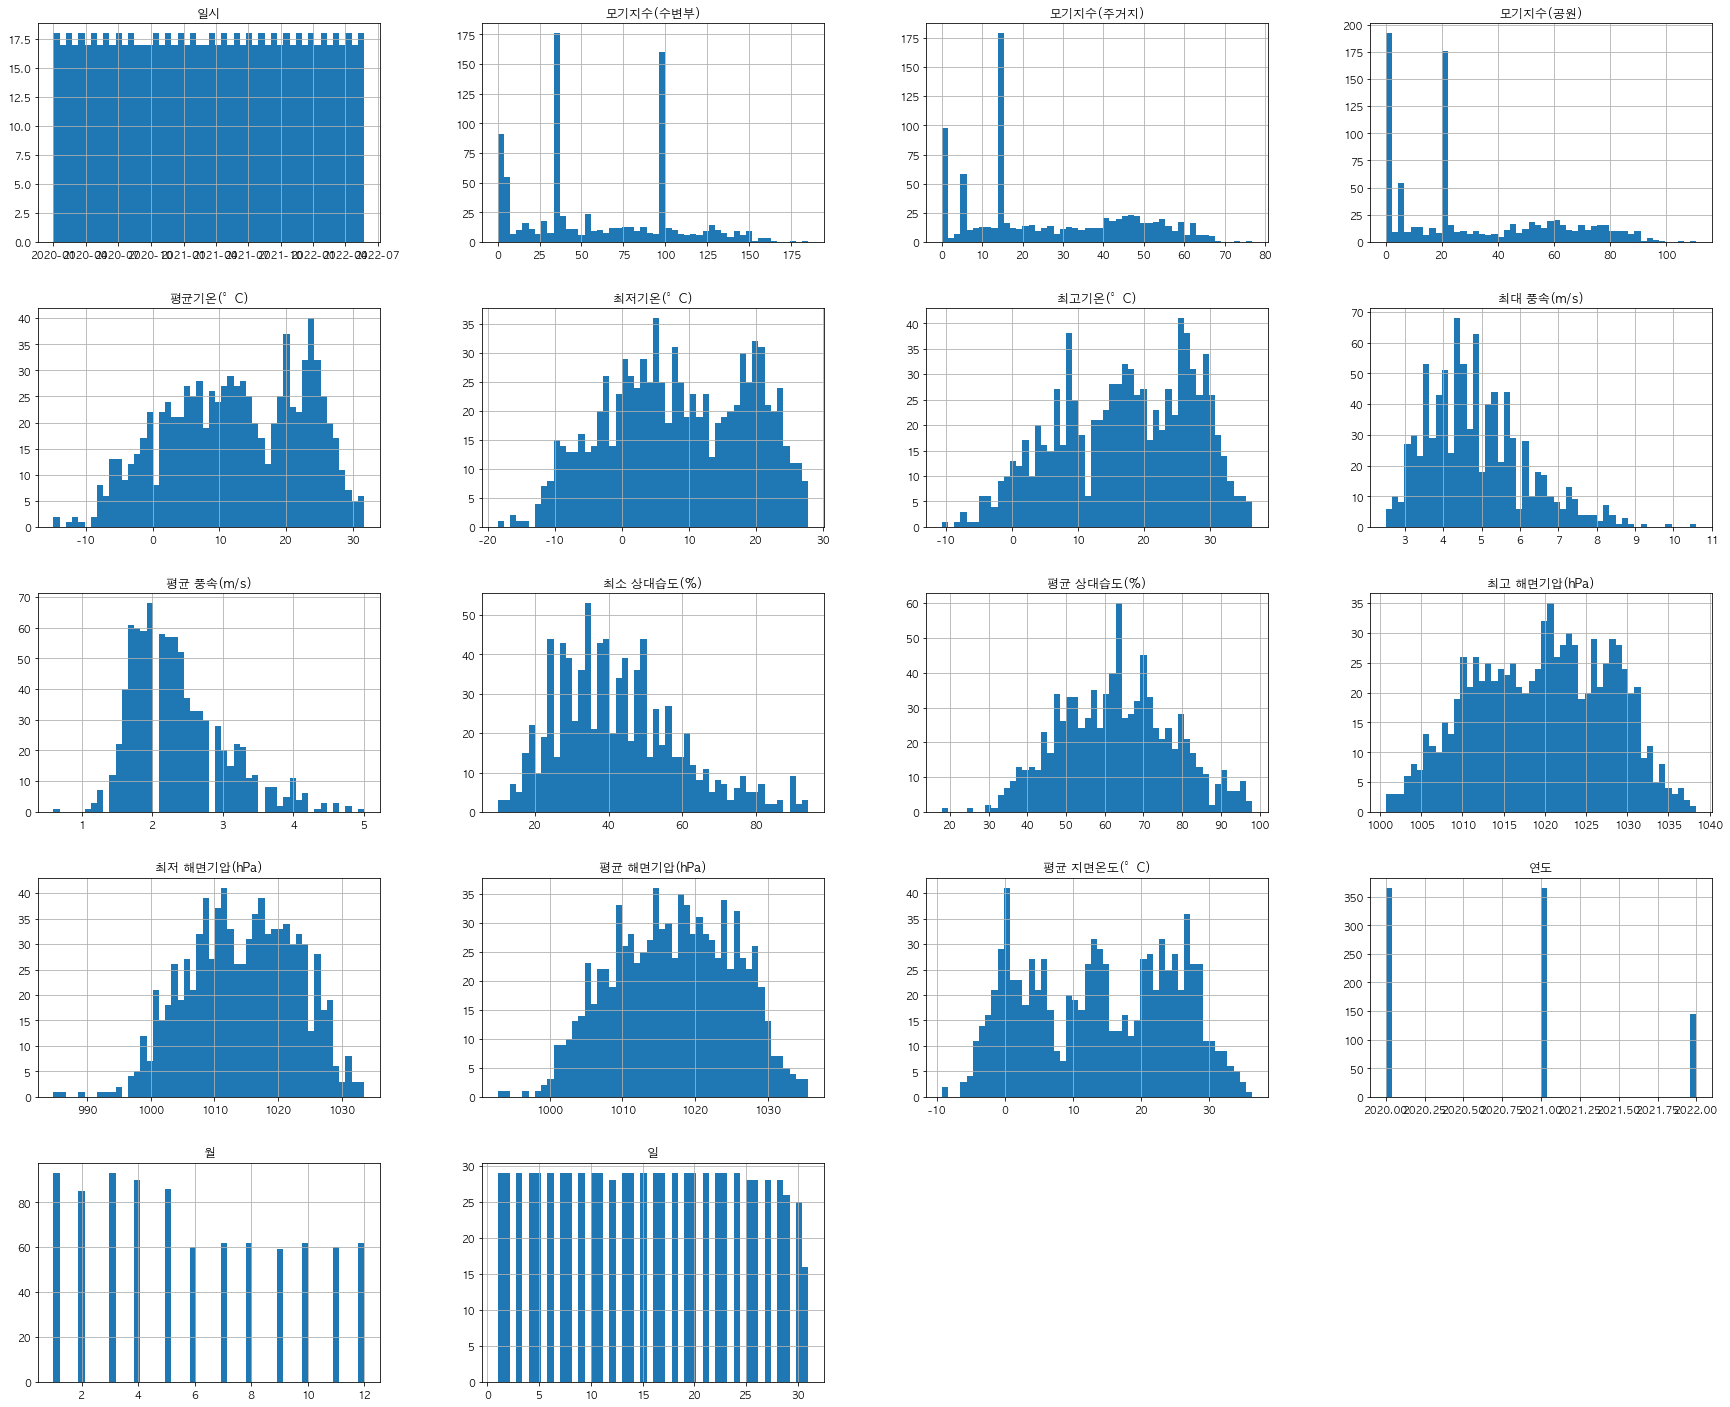

In [21]:
_ = df.hist(figsize=(30,25), bins= 50)

#### 상관관계

In [22]:
# 상관관계_상관계수
df_corr = df.corr(method="pearson")
df_corr

,모기지수(수변부),모기지수(주거지),모기지수(공원),평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s),최소 상대습도(%),평균 상대습도(%),최고 해면기압(hPa),최저 해면기압(hPa),평균 해면기압(hPa),평균 지면온도(°C),연도,월,일
모기지수(수변부),1.000000,0.966129,0.940472,0.853773,0.868700,0.820270,0.026100,-0.010377,0.486461,0.477399,-0.757502,-0.690591,-0.729077,0.866456,-0.249703,0.330287,0.027983
모기지수(주거지),0.966129,1.000000,0.952815,0.880581,0.897749,0.844148,0.003699,-0.036710,0.505302,0.485654,-0.781906,-0.706306,-0.748520,0.889400,-0.219840,0.320961,0.029437
모기지수(공원),0.940472,0.952815,1.000000,0.815061,0.837777,0.773270,-0.021172,-0.046369,0.502554,0.465857,-0.733186,-0.655617,-0.698666,0.819714,-0.380121,0.321593,0.030687
평균기온(°C),0.853773,0.880581,0.815061,1.000000,0.988734,0.988268,-0.077471,-0.138076,0.424731,0.448060,-0.803102,-0.720152,-0.767656,0.974760,-0.165593,0.309916,0.034580
최저기온(°C),0.868700,0.897749,0.837777,0.988734,1.000000,0.959028,-0.066871,-0.109496,0.501821,0.511722,-0.818317,-0.736921,-0.783805,0.958926,-0.181919,0.322118,0.030022
최고기온(°C),0.820270,0.844148,0.773270,0.988268,0.959028,1.000000,-0.086551,-0.165028,0.329926,0.371167,-0.771837,-0.684690,-0.732934,0.971302,-0.143719,0.285918,0.038985
최대 풍속(m/s),0.026100,0.003699,-0.021172,-0.077471,-0.066871,-0.086551,1.000000,0.791302,-0.050753,-0.055396,-0.144968,-0.262107,-0.209536,-0.017848,0.047258,-0.127727,-0.030667
평균 풍속(m/s),-0.010377,-0.036710,-0.046369,-0.138076,-0.109496,-0.165028,0.791302,1.000000,-0.024573,-0.092006,-0.080102,-0.202245,-0.145663,-0.074628,0.046198,-0.129755,-0.016392
최소 상대습도(%),0.486461,0.505302,0.502554,0.424731,0.501821,0.329926,-0.050753,-0.024573,1.000000,0.908487,-0.488769,-0.493806,-0.497572,0.353152,-0.118224,0.301752,0.024100
평균 상대습도(%),0.477399,0.485654,0.465857,0.448060,0.511722,0.371167,-0.055396,-0.092006,0.908487,1.000000,-0.513021,-0.527549,-0.529313,0.372209,-0.112747,0.299084,0.005306


/var/folders/10/7lbx9bn51jl5zt97l3h72p6c0000gn/T/ipykernel_19295/4200925380.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)


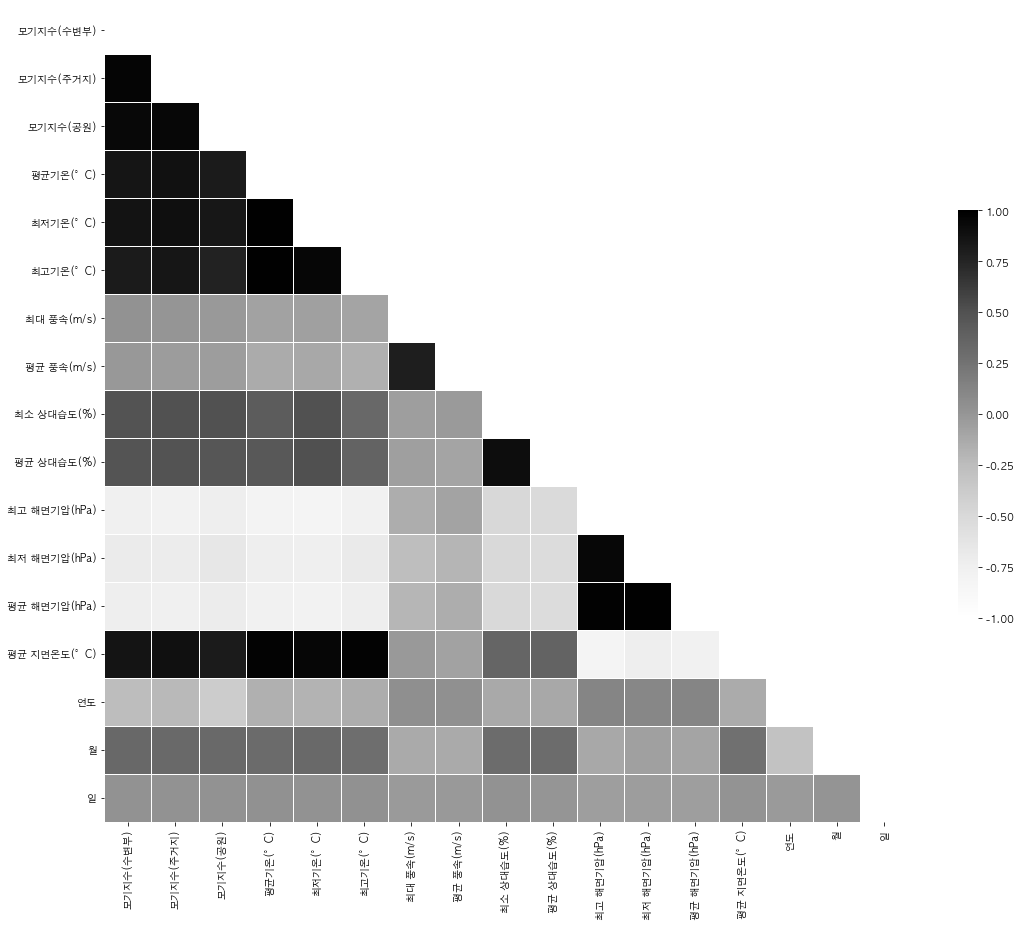

In [23]:
#상관관계 그래프

import numpy as np

plt.figure(figsize=(18,15))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(df_corr, 
            cmap = 'Greys', 
            mask=mask,      # 표시하지 않을 마스크 부분을 지정
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

모기지수는 평균기온, 최저기온, 최고기온, 평균지면온도와 가장 상관이 높음

#### 연도별 모기지수

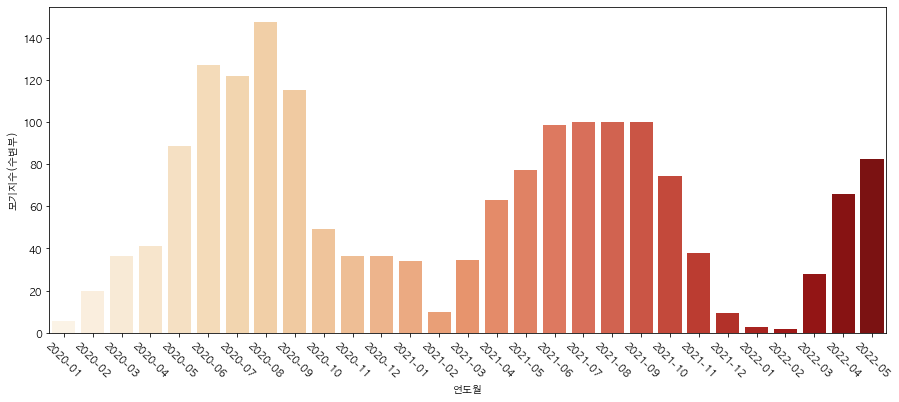

In [24]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation = - 45 )
_ = sns.barplot(data=df, x='연도월', y='모기지수(수변부)', palette='OrRd',ci=None)


#### 연도별 평균기온

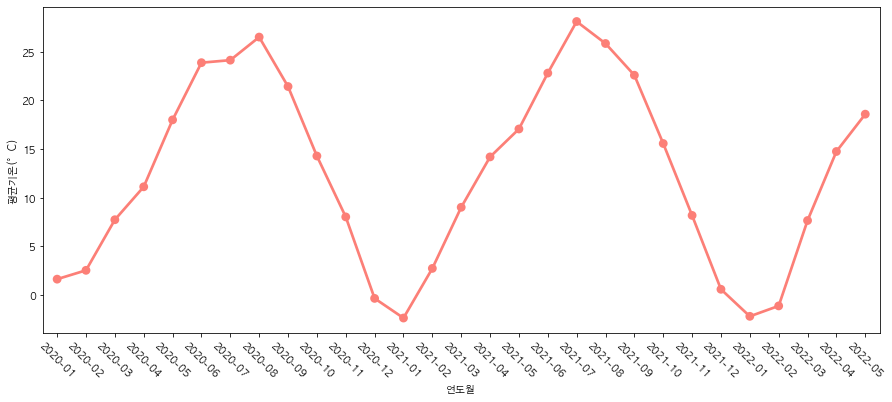

In [25]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation = - 45 )
_ = sns.pointplot(data=df, x='연도월', y='평균기온(°C)',ci=None, color='#FC7F77')

#### 연도별 평균지면온도

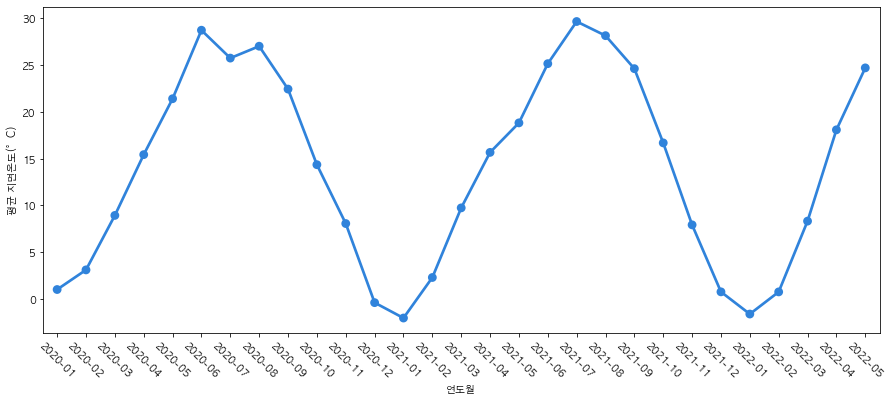

In [26]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation = - 45 )
_ = sns.pointplot(data=df, x='연도월', y='평균 지면온도(°C)',ci=None, color='#3083DB')

#### 수변부 모기지수와 평균기온

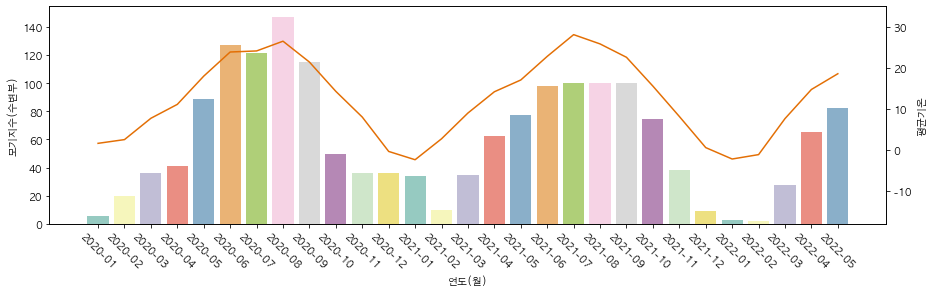

In [27]:
# 수변부 모기지수, 평균기온 시계열 그래프
plt.figure(figsize=(15,4))
plt.xticks(rotation = - 45 )
plt
ax1=sns.barplot(x='연도월', y='모기지수(수변부)', data=df, palette='Set3', ci=None)
ax1.set_xlabel('연도(월)')
ax1.set_ylabel('모기지수(수변부)')

ax=ax1.twinx()
ax=sns.lineplot(x='연도월', y='평균기온(°C)', data=df, color='#E36F05', ci=None )
ax.set_ylabel('평균기온')
ax.set_ylim([-18, 35])
plt.show()

#### 수변부 모기지수와 평균지면온도

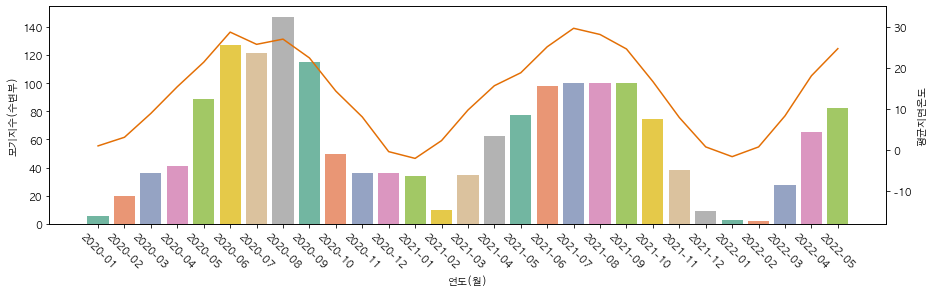

In [28]:
# 주거지 모기지수, 평균 지면온도 시계열 그래프
plt.figure(figsize=(15,4))
plt.xticks(rotation = - 45 )
plt
ax1=sns.barplot(x='연도월', y='모기지수(수변부)', data=df, palette='Set2', ci=None)
ax1.set_xlabel('연도(월)')
ax1.set_ylabel('모기지수(수변부)')

ax=ax1.twinx()
ax=sns.lineplot(x='연도월', y='평균 지면온도(°C)', data=df, color='#E36F05', ci=None)
ax.set_ylabel('평균지면온도')
ax.set_ylim([-18, 35])
plt.show()

#### 공원 모기지수와 평균기온

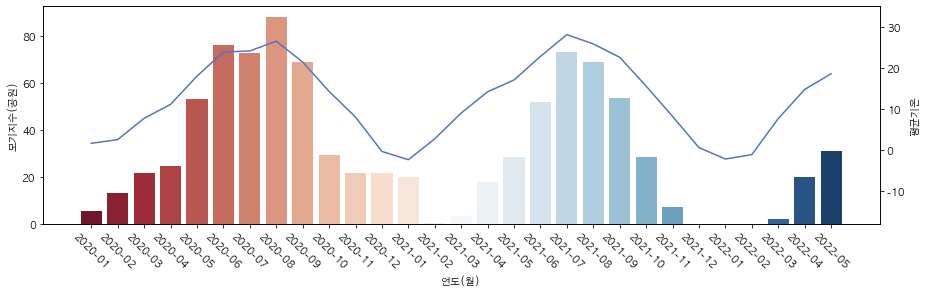

In [29]:
# 공원 모기지수, 평균기온 시계열 그래프
plt.figure(figsize=(15,4))
plt.xticks(rotation = - 45 )
plt
ax1=sns.barplot(x='연도월', y='모기지수(공원)', data=df, palette='RdBu', ci=None)
ax1.set_xlabel('연도(월)')
ax1.set_ylabel('모기지수(공원)')

ax=ax1.twinx()
ax=sns.lineplot(x='연도월', y='평균기온(°C)', data=df, color='#5374C2', ci=None )
ax.set_ylabel('평균기온')
ax.set_ylim([-18, 35])
plt.show()

#### 공원 모기지수와 평균지면온도

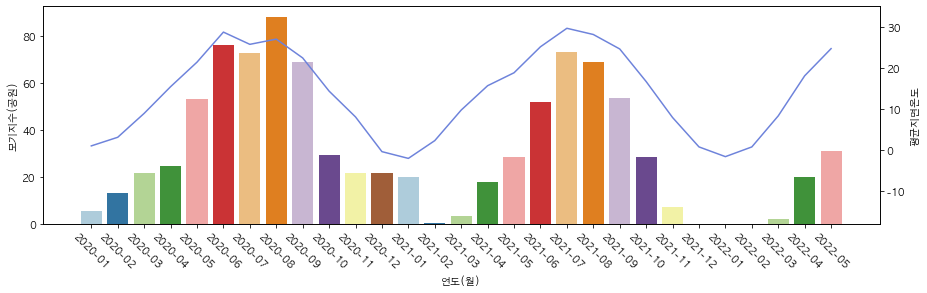

In [30]:
# 공원 모기지수, 평균지면온도 시계열 그래프
plt.figure(figsize=(15,4))
plt.xticks(rotation = - 45 )
plt
ax1=sns.barplot(x='연도월', y='모기지수(공원)', data=df, palette='Paired', ci=None)
ax1.set_xlabel('연도(월)')
ax1.set_ylabel('모기지수(공원)')

ax=ax1.twinx()
ax=sns.lineplot(x='연도월', y='평균 지면온도(°C)', data=df, color='#6E83DB', ci=None )
ax.set_ylabel('평균지면온도')
ax.set_ylim([-18, 35])
plt.show()

#### 주거지 모기지수와 평균지면온도

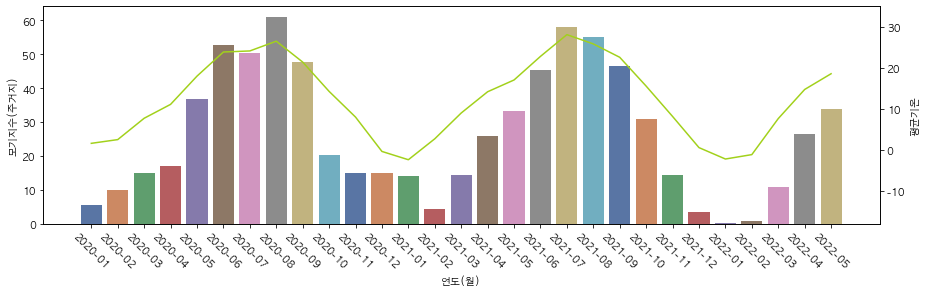

In [31]:
# 주거지 모기지수, 평균기온 시계열 그래프
plt.figure(figsize=(15,4))
plt.xticks(rotation = - 45 )
plt
ax1=sns.barplot(x='연도월', y='모기지수(주거지)', data=df, palette='deep', ci=None)
ax1.set_xlabel('연도(월)')
ax1.set_ylabel('모기지수(주거지)')

ax=ax1.twinx()
ax=sns.lineplot(x='연도월', y='평균기온(°C)', data=df, color='#A2D11B', ci=None)
ax.set_ylabel('평균기온')
ax.set_ylim([-18, 35])
plt.show()

#### 주거지 모기지수와 평균지면온도

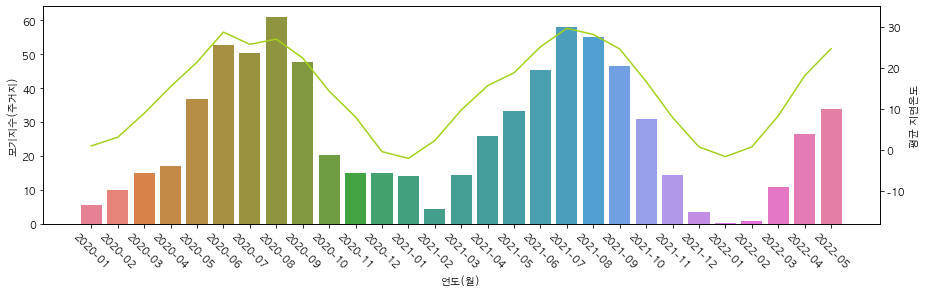

In [32]:
# 주거지 모기지수, 평균지면온도 시계열 그래프
plt.figure(figsize=(15,4))
plt.xticks(rotation = - 45 )
plt
ax1=sns.barplot(x='연도월', y='모기지수(주거지)', data=df, palette='husl', ci=None)
ax1.set_xlabel('연도(월)')
ax1.set_ylabel('모기지수(주거지)')

ax=ax1.twinx()
ax=sns.lineplot(x='연도월', y='평균 지면온도(°C)', data=df, color='#A2D11B', ci=None )
ax.set_ylabel('평균 지면온도')
ax.set_ylim([-18, 35])
plt.show()

#### 결론 및 한계
- 모기지수와 평균기온을 살펴본 결과, 평균기온이 가장 높은 7월과 8월에 모기지수 또한 증가함을 알 수 있음
- 모기지수와 평균지면온도 간의 상관이 높아 살펴보니, 평균지면온도는 6월부터 온도가 높았으며 모기지수가 증가하는 시점과 동일함
- 향후 모기와 관련 있는 주가 데이터 분석을 통해 시계열 분석을 추가적으로 하고자 함